In [1]:
using Pkg

Pkg.activate("../.")

using Plots, DifferentialEquations

Activating environment at `~/Documents/Work/Projects/Working/Bacterial_Interactions/Project.toml`


In [27]:
struct params 
    u1::Float64
    u2::Float64
    l::Float64
    Rm1::Float64
    Rm2::Float64
    ρ::Float64
end

function dC!(dC,C,p,t)
    dC[1] = (C[1] * C[3] * p.u1 * (1-p.l)) - (C[1]*p.Rm1)
    dC[2] = (C[2] * C[3] * p.u2 * (1-p.l)) - (C[2]*p.Rm2)
    dC[3] = p.ρ - (C[1] * C[3] * p.u1 * (1-p.l)) -  (C[2] * C[3] * p.u2 * (1-p.l))
end

dC! (generic function with 1 method)

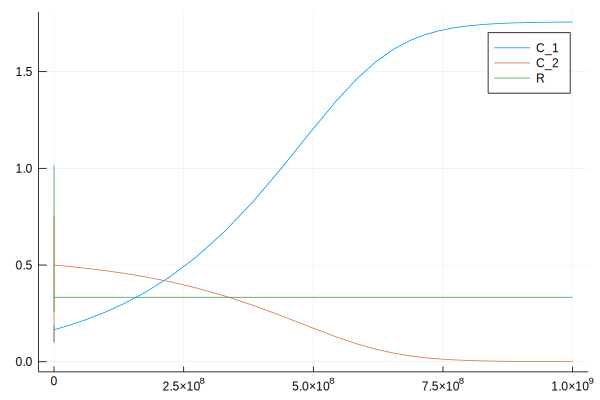

In [28]:
p = params(2.84449507, 9.06487819, #growth
           0.4, #leakage
           0.56889901, 1.81297564, #Resp
           1.0) #rho

C0 = [0.1,0.1,1.0]
tspan = (0.0,1e9)
prob = ODEProblem(dC!,C0,tspan,p)
sol = solve(prob,Rosenbrock23())

p1 = plot(sol.t,hcat(sol.u...)', label = ["C_1","C_2","R"])
p1

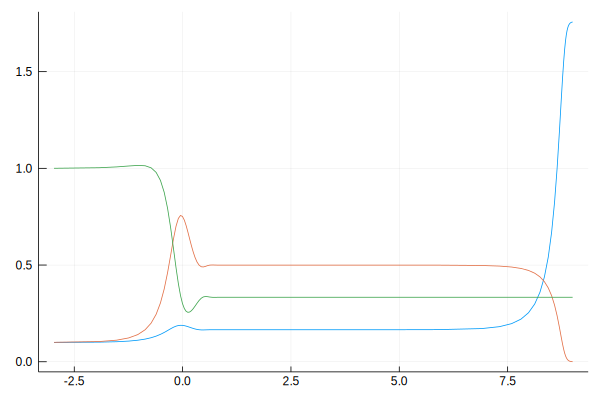

In [26]:
#In log10 timescale
p2 = plot(log10.(sol.t),hcat(sol.u...)', legend = false)
p2